# COMPUTING MOLECULAR DESCRIPTORS

In [56]:
import pandas as pd
import numpy as np
df= pd.read_csv('dataset.csv')
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,991,3423840.0,CNC1=C(N=CC=C1)C=NNC(=S)N,30.0,0
1,2104,3157186.0,CCCC1=C(C2=NC3=CC=CC=C3N2C(=C1)NCCOCCO)C#N,0.0,0
2,838,15945344.0,CCN(CC)C1=CC(=[N+]2CCCC2)CC(C1)(C)C.[I-],45.0,1
3,630,6603246.0,CCCCN1C2=C(CCC2)C(=N)C3=C1CCC3.I,61.0,1
4,1579,2963165.0,CC1=CC=C(C=C1)N2CC(CC2=O)C(=O)NC3=NC4=C(S3)C=C...,0.0,0
...,...,...,...,...,...
2099,946,16746116.0,CC[C@H](CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC...,36.0,1
2100,632,1150803.0,CC(C)(C)C1=CC=C(C=C1)C(=O)NC2=CC=C(C=C2)C(=O)N...,61.0,1
2101,2137,984185.0,C1COC2=C(O1)C=CC(=C2)C(=O)CSC3=NC4=C(C=NN4)C(=...,0.0,0
2102,1743,3220816.0,CN(C)C1=CC=C(C=C1)NC(=O)CN2CCC(CC2)NC(=O)C3CCCCC3,0.0,0


In [57]:
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools, Descriptors, Lipinski
from rdkit import DataStructs

In [58]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [59]:
#function to calculate Morgan fps
def morgan_fps(data):
  fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in data]  # Calculate Morgan fingerprints for each molecule
  fp_array = [np.array(fp) for fp in fps]   # Convert fingerprints to numpy array
  column_names = ["morgan_" + str(i) for i in range(len(fp_array[0]))]
  return pd.DataFrame(fp_array, columns = column_names)


# DATA PROCESSING AND SPLITING

In [60]:
d1 = morgan_fps(mols)

In [61]:
X = pd.concat([d1], axis = 1)
X

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2102,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df["Activity_outcome"]
y

0       0
1       0
2       1
3       1
4       0
       ..
2099    1
2100    1
2101    0
2102    0
2103    0
Name: Activity_outcome, Length: 2104, dtype: int64

In [63]:
from sklearn.feature_selection import VarianceThreshold

# Define variance threshold
# Here, we use a threshold of 0 which would remove all features with zero variance
sel = VarianceThreshold(threshold=0)

# Fit and transform the data
sel.fit(X)

mask = sel.get_support()
X_new = X[X.columns[mask]]


In [64]:
new_columns = X_new.columns
for i in X.columns:
    if i not in new_columns:
            print (i)

morgan_274
morgan_644
morgan_1108
morgan_1643


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
X_train

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1703,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from imblearn.over_sampling import SMOTE

# assuming X_train and y_train are your training features and labels

smote = SMOTE(sampling_strategy='minority',random_state = 2)

X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Now you can train your model using the balanced data:
# model.fit(X_sm, y_sm)

In [11]:
y_test


740     0
380     1
1052    1
1441    1
1758    1
       ..
1363    0
501     0
1385    1
892     0
415     1
Name: Activity_outcome, Length: 632, dtype: int64

In [12]:
X_sm

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
count_1s = (y_test == 0).sum()
print(f"Number of 1s: {count_1s}")



Number of 1s: 373


# APPLICABILITY DOMAIN

In [14]:
import numpy as np
from sklearn import datasets
from scipy.spatial import distance

In [15]:
def in_applicability_domain(X, X_sm, threshold):
    # Calculate the distance from each point in X to its nearest neighbor in X_train
    dist = distance.cdist(X, X_sm, 'euclidean')
    min_dist = np.min(dist, axis=1)
    
    # A point is in the applicability domain if its distance to the nearest neighbor is less than the threshold
    return min_dist < threshold

In [16]:
# Calculate the applicability domain with a threshold of 1.0
app_domain = in_applicability_domain(X_test, X_sm, threshold=5.0)

print('Applicability domain:', app_domain)

Applicability domain: [ True False  True  True  True False  True False False  True False  True
 False False  True False  True False False False False False  True  True
  True  True False False  True  True  True  True False  True False False
 False False  True False False False  True  True  True False False  True
 False  True False False  True False False  True False  True  True  True
  True  True False  True  True  True False False  True  True False  True
 False  True False  True False False False False False False  True  True
 False  True  True  True  True  True False False False  True  True  True
 False  True  True False  True  True  True False  True False  True  True
 False False False  True  True  True  True False False  True  True False
  True False  True  True False False False False  True  True  True  True
 False False  True False False False  True False  True False False False
 False False  True  True False False  True  True False  True False False
 False False False False Fals

In [17]:
# Assuming you have your applicability domain computed as app_domain

# Find inliers which are inside the applicability domain
inliers = app_domain

# Apply the mask to the test dataset
X_test_inliers = X_test[inliers]
X_test_inliers

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1037,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_test_inliers = y_test[inliers]
y_test = y_test_inliers

In [19]:
y_test


740     0
1052    1
1441    1
1758    1
1586    0
       ..
1279    0
1037    1
1363    0
892     0
415     1
Name: Activity_outcome, Length: 278, dtype: int64

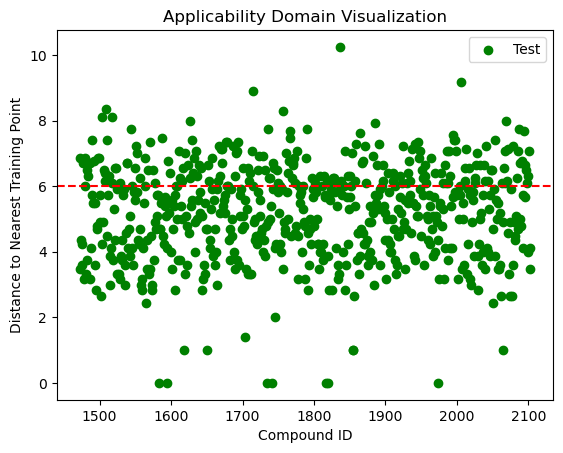

In [51]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

def compute_distances(X, X_train):
    # Calculate the distance from each point in X to its nearest neighbor in X_train
    dist = distance.cdist(X, X_train, 'euclidean')
    min_dist = np.min(dist, axis=1)
    return min_dist

# Compute distances for both train and test data to the train data
train_distances = compute_distances(X_train, X_train)
test_distances = compute_distances(X_test, X_train)

# Create compound IDs
train_ids = range(len(X_train))
test_ids = range(len(X_train), len(X_train) + len(X_test))

# Plot the distances
#plt.scatter(train_ids, train_distances, color='blue', label='Train')
plt.scatter(test_ids, test_distances, color='green', label='Test')

# Draw the threshold line
threshold = 6.0
plt.axhline(y=threshold, color='red', linestyle='--')

# Labeling and show
plt.xlabel('Compound ID')
plt.ylabel('Distance to Nearest Training Point')
plt.title('Applicability Domain Visualization')
plt.legend()
plt.show()


# BUILDING GRADIENT BOOST MODEL

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=4)
gbm.fit(X_sm, y_sm)

preds = gbm.predict(X_test_inliers)
proba = gbm.predict_proba(X_test_inliers)

In [21]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC


print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.8699186991869918, specificity: 0.8064516129032258, precision: 0.781021897810219, f1: 0.8230769230769232 
mcc: 0.6719440331478063, accuracy: 0.8345323741007195, roc_auc: 0.9200104904274848 
balanced_accuracy: 0.8381851560451088


In [ ]:
(from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

# Initialize the classifier
gbm = GradientBoostingClassifier(random_state=4)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearch to the data
grid_search.fit(X_sm, y_sm)

# Print the best parameters
print('Best parameters found: ', grid_search.best_params_))


In [22]:
# Update the model with the best parameters found
gbm = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=9, random_state=5)

# Refit the model to the data
gbm.fit(X_sm, y_sm)

# Make predictions with the optimized model
preds = gbm.predict(X_test_inliers)
proba = gbm.predict_proba(X_test_inliers)

In [23]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC


print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.926829268292683, specificity: 0.8838709677419355, precision: 0.8636363636363636, f1: 0.8941176470588236 
mcc: 0.806334627660101, accuracy: 0.9028776978417267, roc_auc: 0.9510621557828481 
balanced_accuracy: 0.9053501180173092


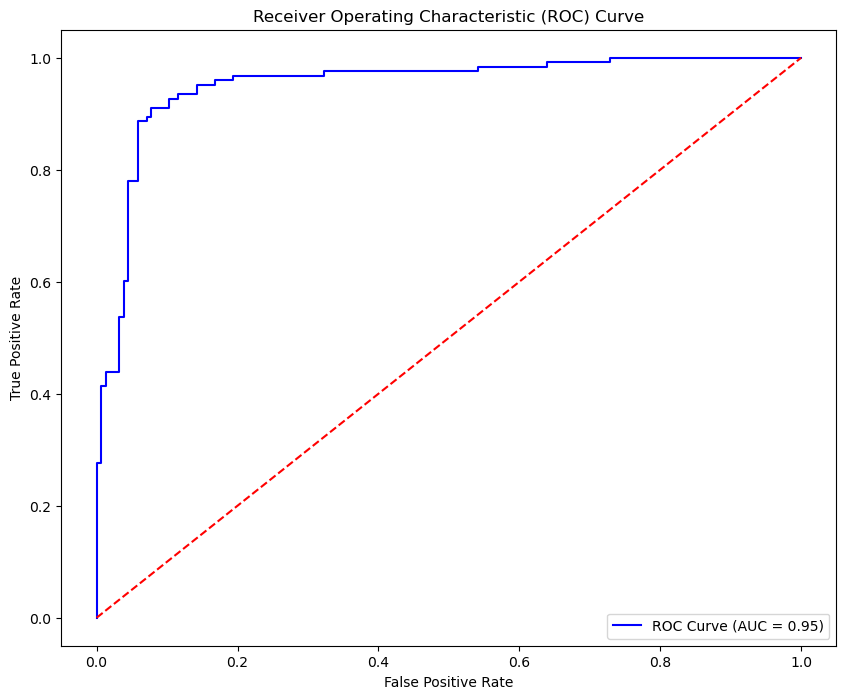

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line, represents random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

# MODEL VALIDATION

In [25]:
import pandas as pd
import numpy as np
dp= pd.read_csv('validation_dataset.csv')
dp

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,486,46903215.0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,71.0,1
1,1700,24980419.0,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0.0,0
2,1309,7567657.0,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,7.0,0
3,1516,2560914.0,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,1.0,0
4,1090,352429.0,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,20.0,0
...,...,...,...,...,...
229,1911,9636483.0,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0.0,0
230,309,16681822.0,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],82.0,1
231,2253,7524261.0,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0.0,0
232,2243,2867068.0,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0


In [26]:
valdata = dp.copy()
colname = ["Canonical_smiles", "Activity_outcome"]
valdata = valdata[colname]

valdata.drop_duplicates(inplace = True, ignore_index = True)
valdata.reset_index(inplace = True, drop = True)
valdata

,Canonical_smiles,Activity_outcome
0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,1
1,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0
2,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,0
3,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,0
4,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,0
...,...,...
229,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0
230,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],1
231,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0
232,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0


In [27]:
smi_list = valdata["Canonical_smiles"].to_list()
molsv = [Chem.MolFromSmiles(smi) for smi in smi_list]

X_val = morgan_fps(molsv)
X_val = X_val[X_val.columns[mask]]
X_val

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y_val = valdata["Activity_outcome"]
y_val

0      1
1      0
2      0
3      0
4      0
      ..
229    0
230    1
231    0
232    0
233    1
Name: Activity_outcome, Length: 234, dtype: int64

In [29]:
count_1s = (y_val == 0).sum()
print(f"Number of 1s: {count_1s}")


Number of 1s: 132


In [30]:
y_valpred = gbm.predict(X_val)
#y_valproba = svm.predict_proba(X_val)

In [31]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_val, y_valpred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
#mcc = matthews_corrcoef(y_val, y_valproba)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
#roc_auc = roc_auc_score(y_val, y_valproba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.803921568627451, specificity: 0.8181818181818182, precision: 0.7735849056603774, f1: 0.7884615384615384 
mcc: 0.806334627660101, accuracy: 0.811965811965812, roc_auc: 0.9510621557828481 
balanced_accuracy: 0.8110516934046346


In [34]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial import distance
import numpy as np

gbm_pipeline = Pipeline([
    ("Variance_threshold", VarianceThreshold(threshold=0)),
    ("Smote", SMOTE(sampling_strategy='minority', random_state=2)),
    ("model", GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=9, random_state=2))
])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [36]:
gbm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('Variance_threshold', VarianceThreshold(threshold=0)),
                ('Smote', SMOTE(random_state=2, sampling_strategy='minority')),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=9,
                                            n_estimators=150,
                                            random_state=2))])

In [37]:
preds = gbm_pipeline.predict(X_test)

In [38]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.7027027027027027, specificity: 0.868632707774799, precision: 0.7878787878787878, f1: 0.7428571428571429 
mcc: 0.5834682970435374, accuracy: 0.8006329113924051, 
balanced_accuracy: 0.7856677052387508


In [39]:
import pickle
with open('gbm_pipeline_new.pkl', 'wb') as file:
    # Use pickle to dump the pipeline into the file
    pickle.dump(gbm_pipeline, file)

In [40]:
with open('my_pipeline.pkl_new', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [41]:
loaded_pipeline.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [43]:
loaded_pipeline.predict(X)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
loaded_pipeline.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [65]:
import sklearn
print(sklearn.__version__)


1.3.2


In [66]:
import sys
import pickle

print("Python version:", sys.version)
print("Pickle version:", pickle.format_version)


Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pickle version: 4.0


In [67]:
X_test


,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1385,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
